In [506]:
def weight_histogram(product_name):
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import csv
    import numpy as np
    # import requests
    # import json
    # import scipy.stats as st
    # import seaborn as sns
    
    # Specify the file path
    file_path = '../data/cleaned/generic_butcher_cleaned.csv'

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

    # Read the CSV file into a DataFrame
    df2 = pd.read_csv(file_path2)

    #Copied data to preserve original dataset
    product_data = df.loc[df["product_name"] == product_name]
    product=product_data.copy()
     
    #Adjust decimal point that were obvious errors
    for index, row in product.iterrows():
        if row['measured_weight'] > 50:
           product.at[index, 'measured_weight'] *= 0.01
        
    # product = product[["product_name","date_time","measured_weight"]]
    # drop_data = product.loc[product['measured_weight']>=50].index
    # product = product.drop(drop_data)
    
    #determine bin min and max in a readable format
    min_wt = np.min(product['measured_weight'])
    max_wt = np.max(product['measured_weight'])
    binmin = np.floor(min_wt)
    binmax = np.ceil(max_wt)

    #deterimined spec goal posts
    weight_min_spec = (df2.loc[df2['product_name']==product_name,'weight_min']).iloc[0]
    weight_max_spec = (df2.loc[df2['product_name']==product_name,'weight_max']).iloc[0]
    weight_avg = np.mean(product['measured_weight'])

    #created bins based on the quarter ounce
    num_bins = int((binmax-binmin)*(1/.25))

    #pulls measured weight data for the x value of the histogram
    #x is the measurment and the y is the count
    product = product['measured_weight']

    plt.figure(figsize=(10,6))
    plt.hist(product,bins=num_bins)
    plt.axvline(weight_avg, color="green", linewidth= 3)
    plt.axvline(weight_min_spec, color="red")
    plt.axvline(weight_max_spec, color="red")
    plt.title(product_name)
    plt.xlabel('Weight (oz)')
    plt.ylabel('Count')
    plt.show()

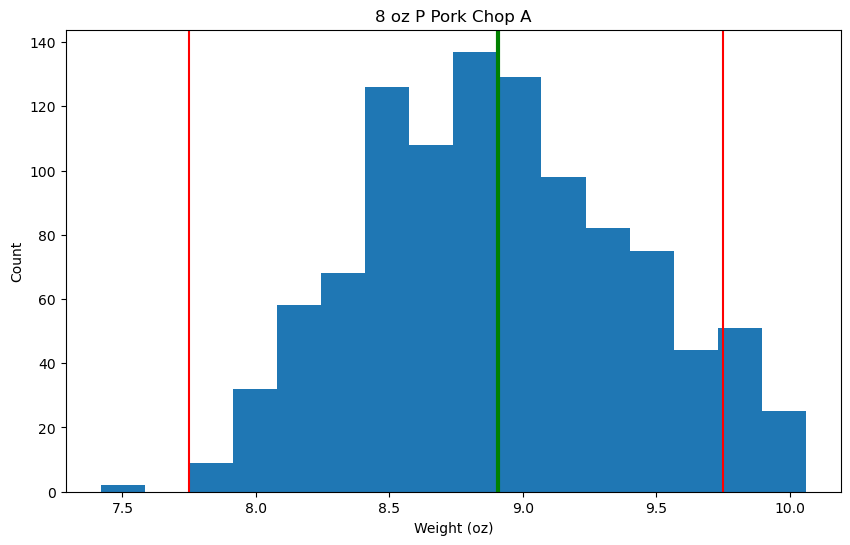

In [507]:
weight_histogram('8 oz P Pork Chop A')